In [5]:
import glob, os, ast, warnings, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bambi import Model
import pymc3 as pm
import pystan
import bct
import scipy.io
sns.set_context("poster")
sns.set(style="ticks",font="Arial",font_scale=2)
warnings.filterwarnings("ignore")

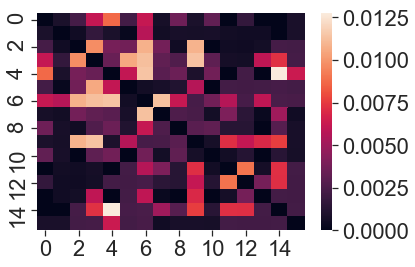

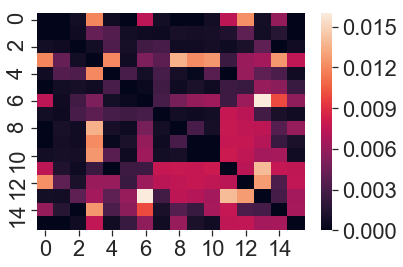

In [15]:
s1_mats = scipy.io.loadmat('state1_response_matrices.mat')
s2_mats = scipy.io.loadmat('state2_response_matrices.mat')

sns.heatmap(s1_mats['pre_active'])
plt.show();
sns.heatmap(s1_mats['post_active'])
plt.show();


In [22]:
help(sns.clustermap)

Help on function clustermap in module seaborn.matrix:

clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data: 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters.
        See scipy.cluster.hierarchy.linkage documentation for more information:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    metric : str, optional
        Distance metric to use for the data. See
        

In [30]:
s1_pre_active = pd.DataFrame(s1_mats['pre_active'],columns=s1_mats["labels"],index=s1_mats["labels"]);
s1_post_active = pd.DataFrame(s1_mats['post_active'],columns=s1_mats["labels"],index=s1_mats["labels"]);

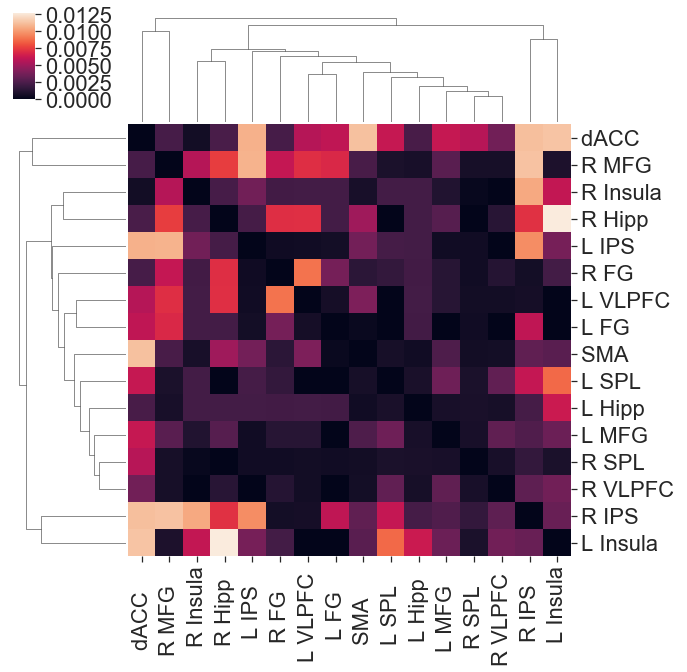

In [32]:
sns.clustermap(s1_pre_active)

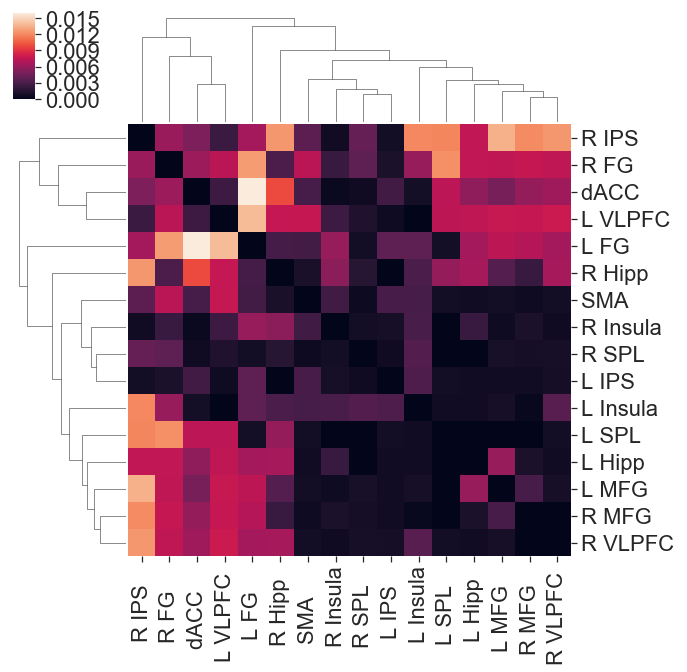

In [33]:
sns.clustermap(s1_post_active)

In [34]:
s2_pre_deactive = pd.DataFrame(s2_mats['pre_deactive'],columns=s2_mats["labels"],index=s2_mats["labels"]);
s2_post_deactive = pd.DataFrame(s2_mats['post_deactive'],columns=s2_mats["labels"],index=s2_mats["labels"]);

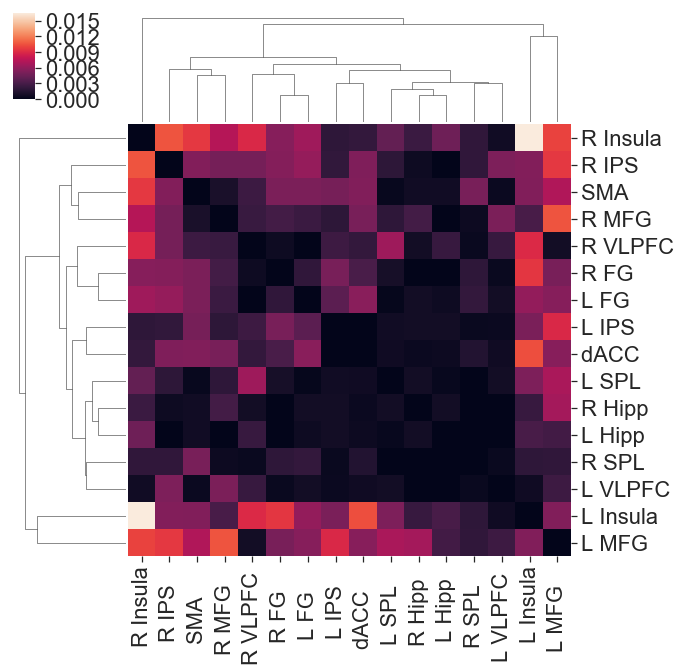

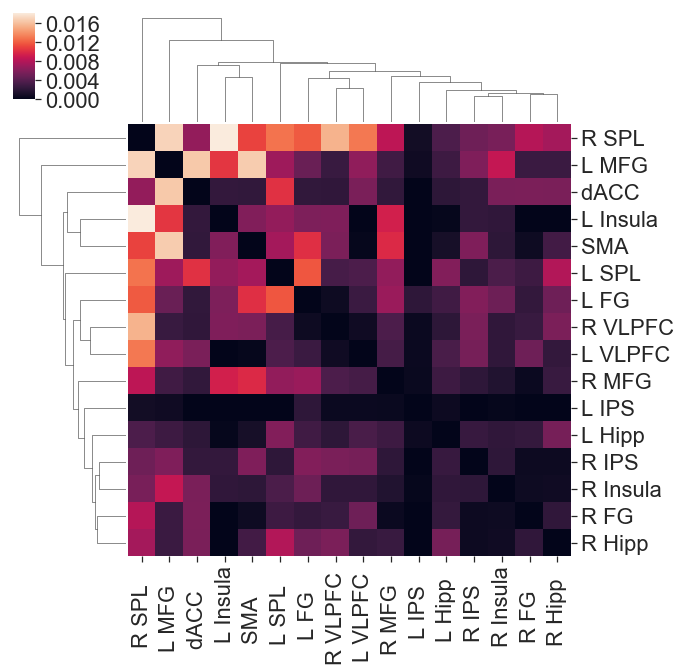

In [35]:
sns.clustermap(s2_pre_deactive)
plt.show();
sns.clustermap(s2_post_deactive)

[1 1 2 2 1 2 1 1 1 2 1 3 3 2 3 1]


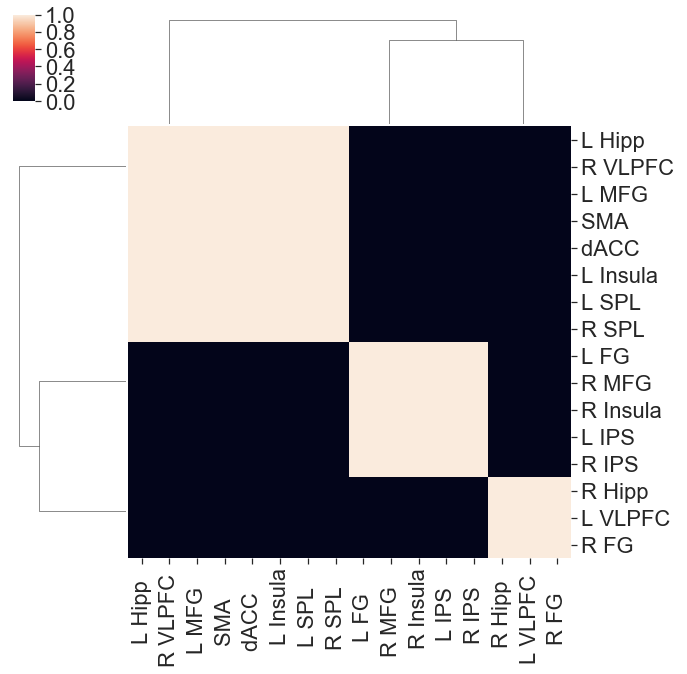

In [62]:
l, q = bct.community_louvain(s1_mats['pre_active'])
a = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        if l[i] == l[j]:
            a[i,j] = 1
a = pd.DataFrame(a,columns=s1_mats["labels"],index=s1_mats["labels"])
sns.clustermap(a)

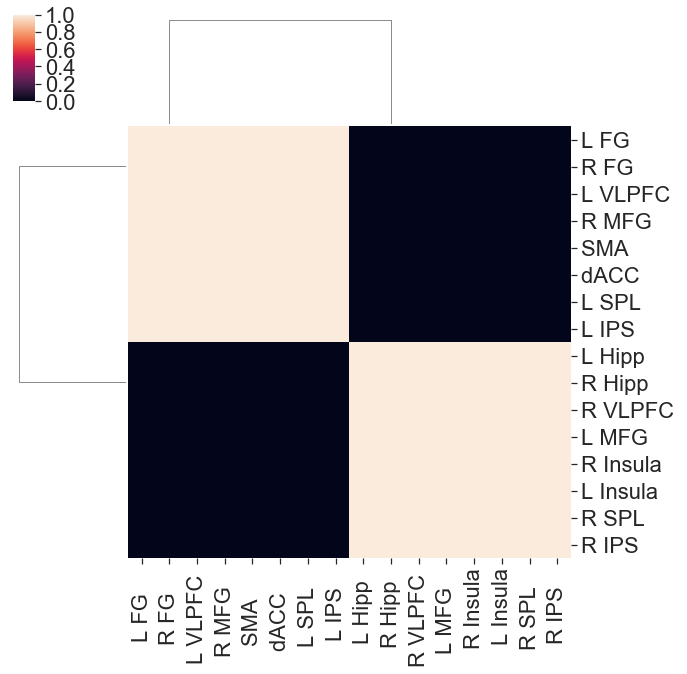

In [65]:
l, q = bct.community_louvain(s1_mats['post_active'])
a = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        if l[i] == l[j]:
            a[i,j] = 1
a = pd.DataFrame(a,columns=s1_mats["labels"],index=s1_mats["labels"])
sns.clustermap(a)

In [13]:
bct.community_louvain(s1_mats['pre_deactive'])

(array([4, 4, 4, 2, 1, 4, 2, 3, 4, 3, 4, 2, 2, 2, 3, 4]), 0.14672769141154174)

In [12]:
bct.community_louvain(s1_mats['post_deactive'])

(array([1, 1, 1, 2, 2, 4, 4, 1, 3, 2, 1, 4, 4, 1, 4, 1]), 0.17862221906134013)

In [85]:
bct.betweenness_wei(s1_mats['pre_active'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
bct.community_louvain(s2_mats['pre_active'])

(array([1, 2, 2, 1, 3, 1, 4, 1, 1, 4, 2, 4, 4, 4, 1, 4]), 0.167808826869751)

In [17]:
bct.community_louvain(s2_mats['post_active'])

(array([2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1]), 0.2569476505174926)

In [18]:
bct.community_louvain(s2_mats['pre_deactive'])

(array([1, 2, 2, 3, 1, 1, 2, 2, 3, 3, 1, 3, 2, 2, 3, 1]), 0.06978045306223019)

In [19]:
bct.community_louvain(s2_mats['post_deactive'])

(array([2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 2, 2]), 0.05415365538928017)

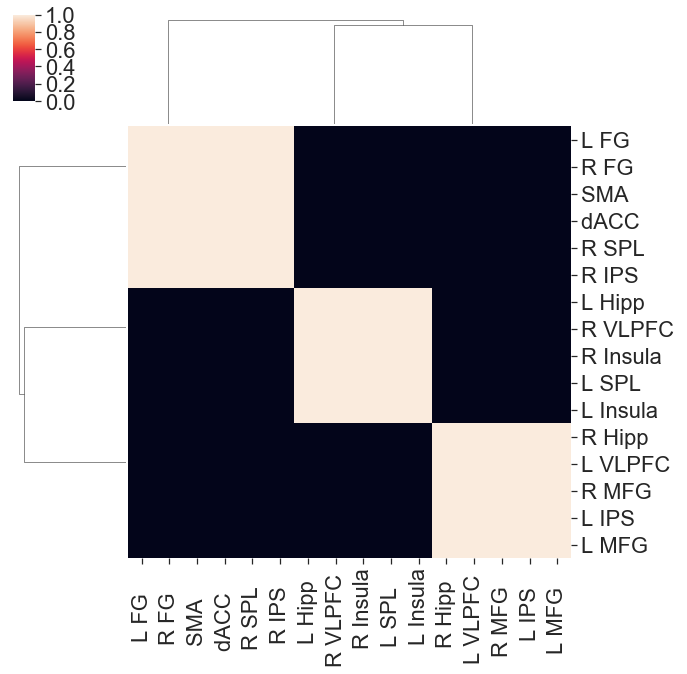

In [66]:
l, q = bct.community_louvain(s2_mats['pre_deactive'])
a = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        if l[i] == l[j]:
            a[i,j] = 1
a = pd.DataFrame(a,columns=s2_mats["labels"],index=s2_mats["labels"])
sns.clustermap(a)

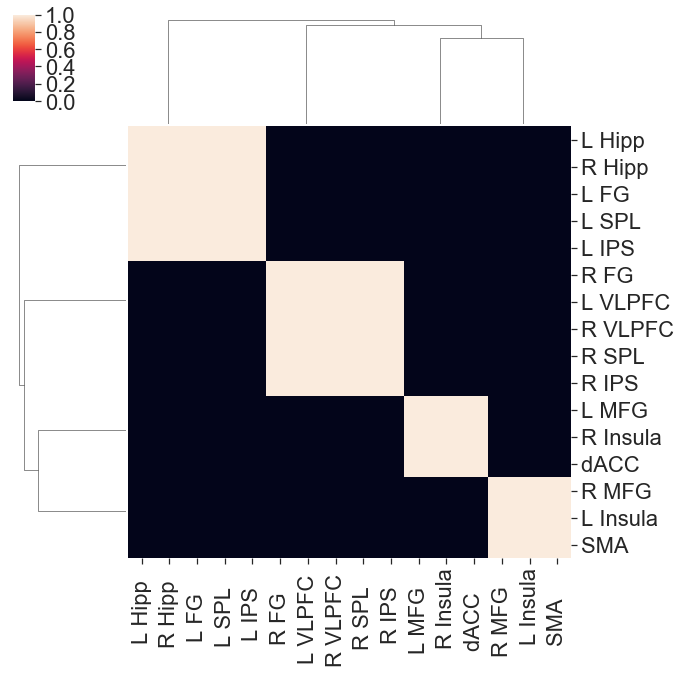

In [67]:
l, q = bct.community_louvain(s2_mats['post_deactive'])
a = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        if l[i] == l[j]:
            a[i,j] = 1
a = pd.DataFrame(a,columns=s2_mats["labels"],index=s2_mats["labels"])
sns.clustermap(a)

In [4]:
def plot_task_matrix(gammas):
    f = plt.figure
    with open(gammas, "rb") as input_file:
        group_result = pickle.load(input_file)

    plot_order = merged_order(group_result)
    topic_sums = [group_result.topic_sums[o] for o in plot_order]

    cmap="Reds"

    return f, plot_order, topic_sums


In [6]:
class Output:
    def __init__(self, ids, labels, gammas, topic_sums):
        self.ids = ids
        self.labels = labels
        self.gammas = gammas
        self.topic_sums = topic_sums

In [28]:
task_name = "math1"

gammas = 'gammas_out/%s_k20_group_gammas.pkl'%(task_name)
model = 'dtm_fit_%s_20k'%(task_name)
indiv_gamma = 'gammas_out/%s_indiv_gammas.pkl'%(task_name)

with open(gammas, "rb") as f:
    #u = pickle._Unpickler(f)
    #u.encoding = 'latin1'
    #group_result = u.load()
    group_result = pickle.load(f, encoding='latin1')
    
group_result
#fig1, plot_order, topic_sums = plot_task_matrix(gammas)

In [ ]:
def plot_response_longitudinal(task_names):
    f, axes = plt.subplots(2,2)
    labels = ['L SPL', 'R SPL', 'L IPS', 'R IPS', 'L Insula', 'R Insula',
              'dACC', 'SMA', 'L MFG', 'R MFG', 'R VLPFC', 'L VLPFC',
              'R FG', 'L FG', 'R Hipp', 'L Hipp']
    plot_row = 0

    long_gammas = np.zeros([4,4])
    g_i = 0
    indiv_gammas = []
    nRois = 16
    conn_mats,mat_type = [], []
    for t_i, task_name in enumerate(task_names):
        gammas = 'gammas_out/%s_k20_group_gammas.pkl'%(task_name)
        model = 'dtm_fit_%s_20k'%(task_name)
        indiv_gamma = 'gammas_out/%s_indiv_gammas.pkl'%(task_name)
        fig1, plot_order, topic_sums = plot_task_matrix(gammas)

        with open(indiv_gamma, "rb") as input_file:
            group_result = pickle.load(input_file)
        indiv_gammas.append(group_result)

        for tl_i, topic_list in enumerate(plot_order):
            topics = []
            topic_weights = topic_sums[tl_i]
            topic_weights = topic_weights/np.sum(topic_weights)
            for t_i, t in enumerate(topic_list):
                topic = pd.DataFrame.from_csv('topics/%s_k20/dynamic_data_topic_%s'%(task_name,t))
                topics.append(topic*topic_weights[t_i])
            topic = pd.concat(topics)
            weights = np.mean(topic,axis=1)
            weights = flipab(weights)

            activations = [['bb'],['aa']]

            for index, grp in enumerate(activations):
                mat_type.append((task_name,grp))

                conn_mat = np.zeros([nRois,nRois])
                for activity in grp:
                    for word in weights.index:
                        if activity in word:
                            inds = [int(filter(str.isdigit, str(l)))-1 for l in word.split('_')]
                            conn_mat[inds[0],inds[1]]+=np.sum(weights[word]) #mean
                            conn_mat[inds[1],inds[0]]+=np.sum(weights[word])
                conn_mats.append(conn_mat)

    # state 1 - want to see what is more active in post
    s1_bb = conn_mats[4] - conn_mats[0]
    s1_aa = conn_mats[5] - conn_mats[1]
    # state 2 - want to see what is less active in post
    s2_bb = conn_mats[6] - conn_mats[2]
    s2_aa = conn_mats[7] - conn_mats[3]

    conn_mats = [[s1_bb,s1_aa],[s2_bb,s2_aa]]
    for tl_i, topic_list in enumerate(plot_order):
        curr_mats = conn_mats[tl_i]
        curr_mats = np.array(curr_mats)
        curr_mats = curr_mats/np.sum(curr_mats)

        for index, cm in enumerate(curr_mats):
            activity = activations[index][0]
            axis = axes[plot_row,index]
            vmax = 0.06
            g = sns.heatmap(cm, square=True, linewidths=.5, #vmax=vmax,
                            vmax=vmax, cbar_kws={"shrink": .5},ax=axis)
            g.set_yticklabels(labels[::-1],rotation=0)
            g.set_xticklabels(labels,rotation=90)
            if activity[0] == 'b' and activity[1] == 'a':
                # Uncoordinated Response is a nonsymmetric ba matrix
                axis.set_title('Uncoordinated Response')
                axis.set_ylabel('Active (b)')
                axis.set_xlabel('Inactive (a)')
            elif activity == 'bb':
                axis.set_title('Coordinated Active Response')
            elif activity == 'aa':
                axis.set_title('Coordinated Deactive Response')

        plot_row+=1

    plt.tight_layout()
    plt.show()
    return f


In [91]:
a = np.loadtxt('gammas_out/opto_gammas.txt')
np.shape(a)

(12, 480)

In [108]:
with open('fit_models/dtm_fit_opto_20k', 'rb') as f:
    content = pickle.load(f)

ModuleNotFoundError: No module named 'gensim'

In [101]:
with open('gammas_out/opto_k20_group_gammas.pkl', 'rb') as f:
    content = pickle.load(f)

AttributeError: Can't get attribute 'Output' on <module '__main__'>

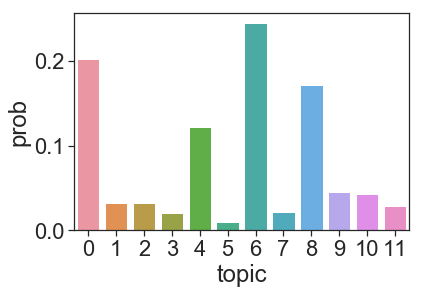

In [87]:
a = np.loadtxt('gammas_out/opto_gammas.txt')
df = {'prob':list(a.mean(axis=1)),
     'topic':range(len(a[:,0]))}
df = pd.DataFrame.from_dict(df)
f = sns.barplot(x='topic',y='prob',data=df)

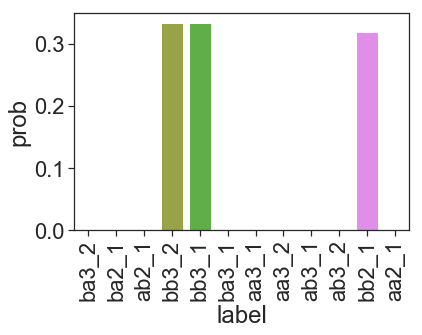

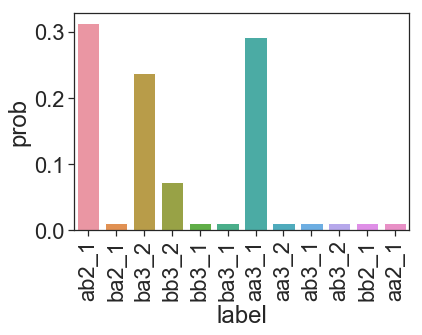

In [109]:
#topics = [6,0,4,8]
topics = [0,4]
for t in topics:
    a = pd.read_csv('topics/opto_k20/dynamic_data_topic_%s'%t)
    b = a.drop(columns=['Unnamed: 0'])
    df = {'prob':list(b.mean(axis=1)),
         'label':list(a['Unnamed: 0'])}
    df = pd.DataFrame.from_dict(df)
    f = sns.barplot(x='label',y='prob',data=df)
    for item in f.get_xticklabels():
        item.set_rotation(90)
    plt.show();

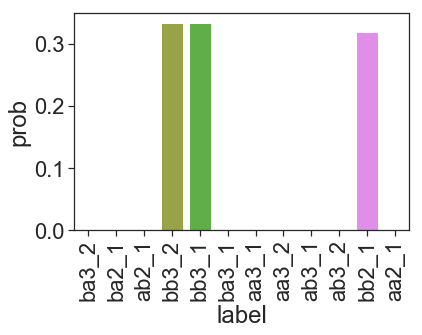

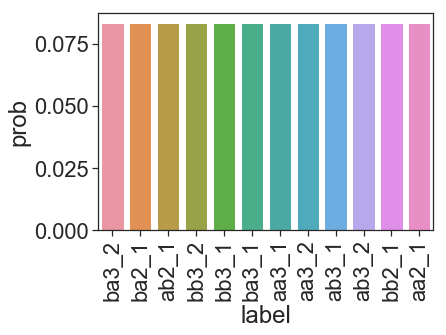

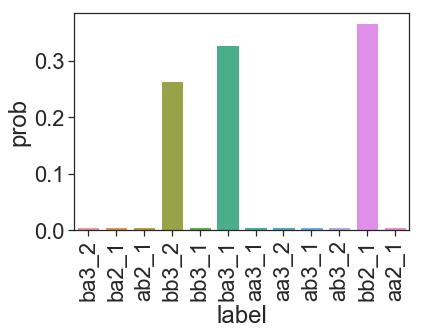

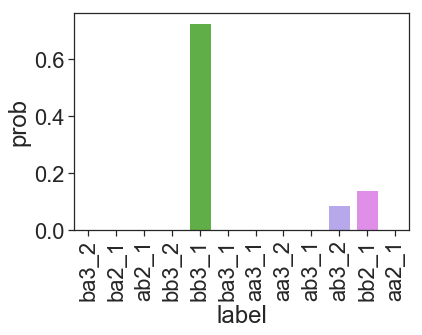

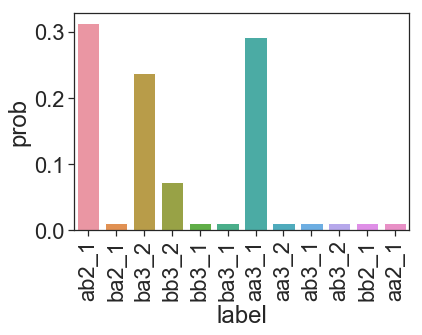

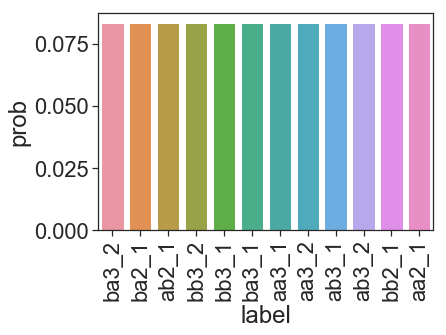

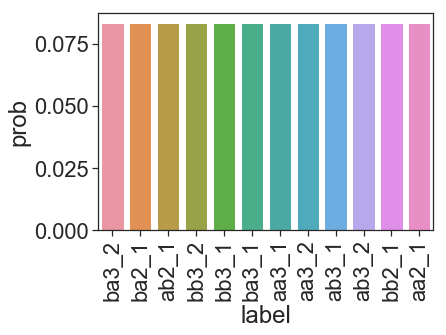

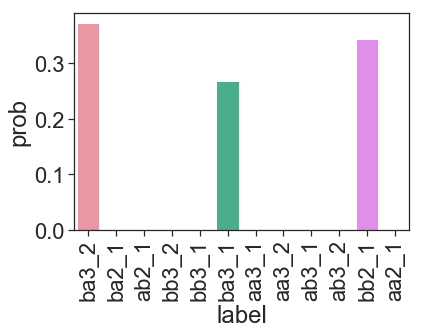

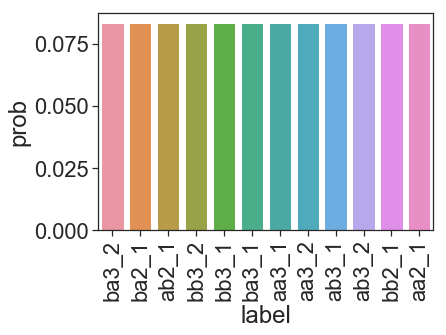

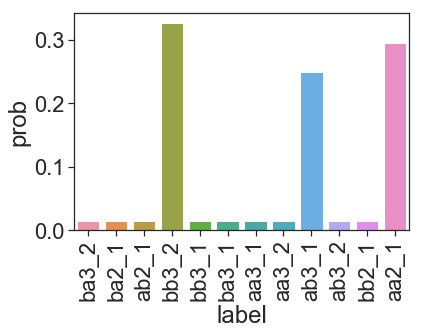

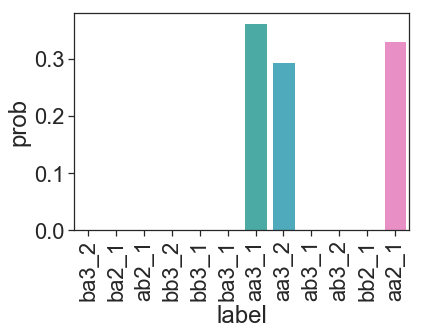

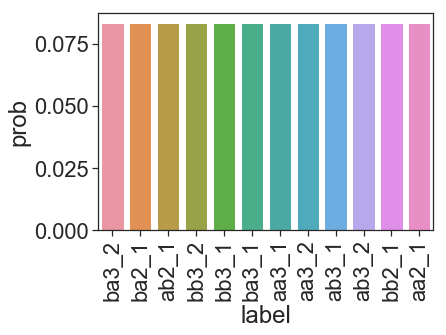

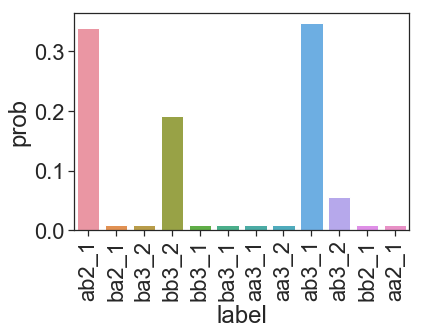

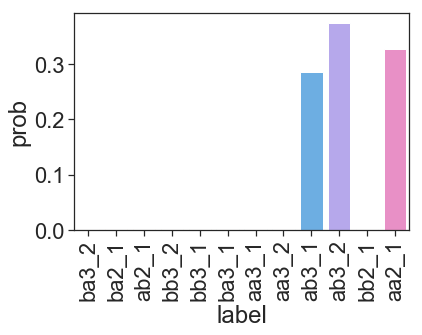

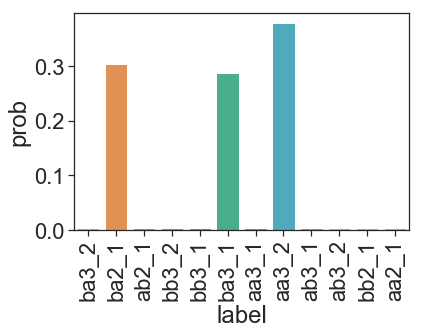

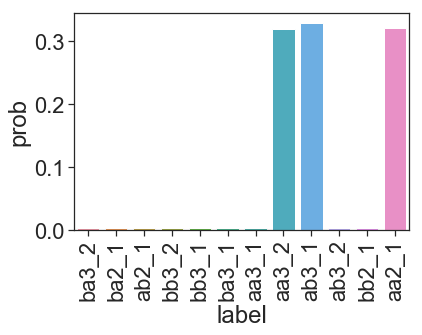

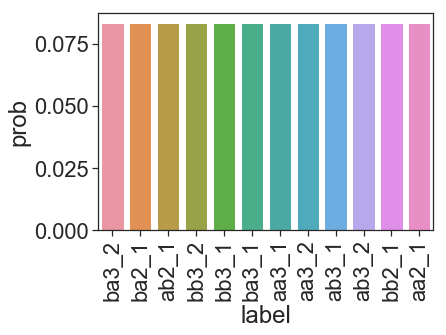

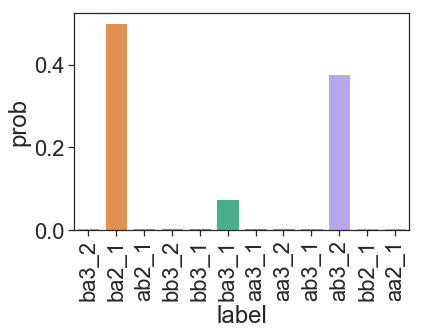

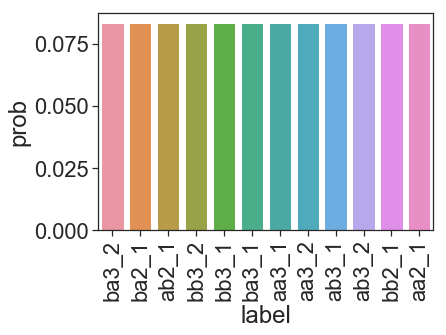

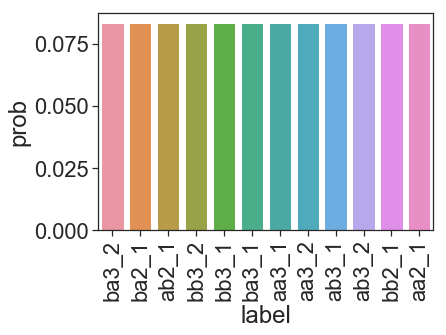

In [111]:
topics = range(20)
for t in topics:
    a = pd.read_csv('topics/opto_k20/dynamic_data_topic_%s'%t)
    b = a.drop(columns=['Unnamed: 0'])
    df = {'prob':list(b.mean(axis=1)),
         'label':list(a['Unnamed: 0'])}
    df = pd.DataFrame.from_dict(df)
    f = sns.barplot(x='label',y='prob',data=df)
    for item in f.get_xticklabels():
        item.set_rotation(90)
    plt.show();